# Análise do Dataset Google Play Store

Este notebook apresenta uma análise do dataset da Google Play Store, que contém informações detalhadas sobre aplicativos, como categorias, avaliações, número de instalações e preços.

### Objetivos:
1. Explorar o dataset e entender a distribuição dos dados.
2. Realizar limpeza e ajustes para preparar os dados para análise.
3. Obter insights sobre:
    - Avaliações dos aplicativos.
    - Proporção entre aplicativos gratuitos e pagos.
    - Distribuição de categorias.

### Estrutura:
O notebook está dividido em seis etapas principais:
1. Introdução.
2. Carregamento do dataset.
3. Limpeza e preparação dos dados.
4. Análise exploratória.
5. Visualizações.
6. Conclusões.


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np

# Carregando o dataset
file_path = "googleplaystore.csv"  # Substitua pelo caminho correto do arquivo
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas do dataset
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Identificando valores únicos na coluna "Installs"
print("Valores únicos em 'Installs':")
print(df['Installs'].unique())

# Filtrando apenas linhas válidas para conversão (com valores numéricos válidos)
# Remove qualquer valor não numérico
df = df[df['Installs'].str.contains(r'^\d', na=False)]

# Ajustando o formato da coluna 'Installs' (removendo '+' e ',' e convertendo para int)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Verificando a correção
print("\nTipos de dados e primeiras linhas após ajustar 'Installs':")
print(df.dtypes)
print(df.head())


Valores únicos em 'Installs':
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']

Tipos de dados e primeiras linhas após ajustar 'Installs':
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                   

In [5]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

# Verificando o número de linhas após a remoção de duplicados
print(f"Número de linhas após remoção de duplicados: {len(df)}")


Número de linhas após remoção de duplicados: 10357


In [8]:
# Exibindo os valores reais no Top 5
print("Top 5 apps por número de instalações (valores reais):")
print(top_5_installs)


Top 5 apps por número de instalações (valores reais):
                    App    Installs  Installs (Bilhões)
3454       Google Drive  1000000000                 1.0
865   Google Play Games  1000000000                 1.0
3523       Google Drive  1000000000                 1.0
2544           Facebook  1000000000                 1.0
2545          Instagram  1000000000                 1.0


Top 10 apps por número de instalações:
                            App    Installs
3454               Google Drive  1000000000
865           Google Play Games  1000000000
3523               Google Drive  1000000000
2544                   Facebook  1000000000
2545                  Instagram  1000000000
464                    Hangouts  1000000000
3223  Maps - Navigate & Explore  1000000000
3816                Google News  1000000000
4170               Google Drive  1000000000
3896             Subway Surfers  1000000000


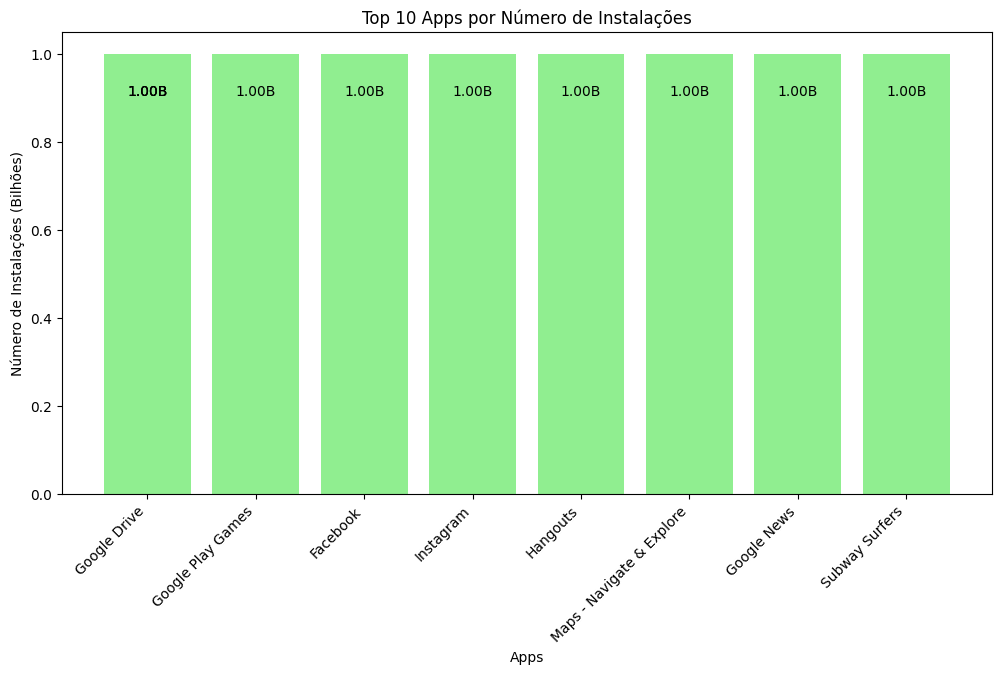

In [9]:
import matplotlib.pyplot as plt

# Selecionar Top 10 apps por número de instalações
top_10_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

# Verificar os valores no Top 10
print("Top 10 apps por número de instalações:")
print(top_10_installs)

# Gerar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_installs['App'], top_10_installs['Installs'] / 1e9, color='lightgreen')

# Adicionando rótulos
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             f"{bar.get_height():.2f}B", ha='center', va='bottom')

plt.title('Top 10 Apps por Número de Instalações')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações (Bilhões)')
plt.xticks(rotation=45, ha='right')
plt.show()



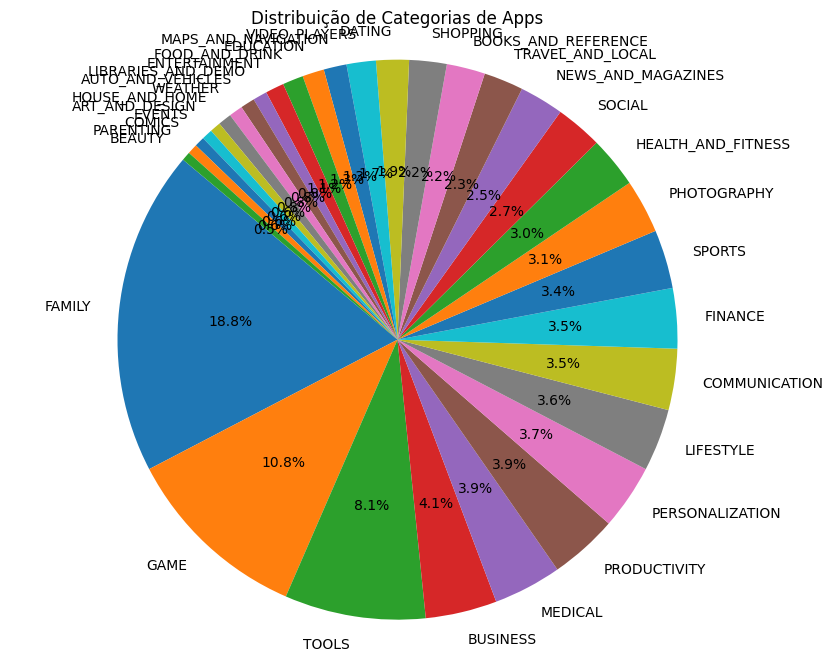

In [10]:
# Frequência de cada categoria
category_counts = df['Category'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias de Apps')
plt.axis('equal')
plt.show()


In [11]:
# Encontrando o app mais caro
most_expensive_app = df[df['Price'] == df['Price'].max()]

# Exibindo o app mais caro
print("App mais caro:")
print(most_expensive_app[['App', 'Price']])


App mais caro:
                                                     App Price
0         Photo Editor & Candy Camera & Grid & ScrapBook     0
1                                    Coloring book moana     0
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     0
3                                  Sketch - Draw & Paint     0
4                  Pixel Draw - Number Art Coloring Book     0
...                                                  ...   ...
10836                                   Sya9a Maroc - FR     0
10837                   Fr. Mike Schmitz Audio Teachings     0
10838                             Parkinson Exercices FR     0
10839                      The SCP Foundation DB fr nn5n     0
10840      iHoroscope - 2018 Daily Horoscope & Astrology     0

[9592 rows x 2 columns]


In [12]:
# Contando os apps classificados como Mature 17+
mature_apps_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]

print(f"Quantidade de apps classificados como 'Mature 17+': {mature_apps_count}")


Quantidade de apps classificados como 'Mature 17+': 447


In [13]:
# Selecionando os top 10 apps por número de reviews
top_10_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

print("Top 10 apps por número de reviews:")
print(top_10_reviews)


Top 10 apps por número de reviews:
                                                    App Reviews
2989                             GollerCepte Live Score    9992
4970                       Ad Block REMOVER - NEED ROOT     999
2705                                SnipSnap Coupon App    9975
3049                  US Open Tennis Championships 2018    9971
3229                                         DreamTrips    9971
7002   Adult Color by Number Book - Paint Mandala Pages     997
6724                     BSPlayer ARMv7 VFP CPU support    9966
7982  Easy Resume Builder, Resume help, Curriculum v...     996
353                                   MegaFon Dashboard   99559
5326                                      Al jazeera TV    9952


In [15]:
# Total de instalações
total_installs = df['Installs'].sum()

print(f"Total de instalações no dataset: {total_installs}")


Total de instalações no dataset: 146631914527


In [14]:
# Média de avaliações por categoria
rating_mean_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("Média de avaliações por categoria:")
print(rating_mean_by_category)


Média de avaliações por categoria:
Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
SHOPPING               4.251485
WEATHER                4.244000
SPORTS                 4.225175
PRODUCTIVITY           4.201796
FAMILY                 4.191153
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.182895
MEDICAL                4.182450
LIBRARIES_AND_DEMO     4.178462
HOUSE_AND_HOME         4.164706
FOOD_AND_DRINK         4.164151
COMICS                 4.155172
COMMUNICATION          4.151466
ENTERTAINMENT          4.136036
NEWS_AND_MAGAZINES     4.128505
FINANCE                4.127445
BUSINESS               4.102593
LIFESTYLE              4.096066
TRAVEL_AND_LOCAL       4.094146
VIDEO_PLAYERS          4.063

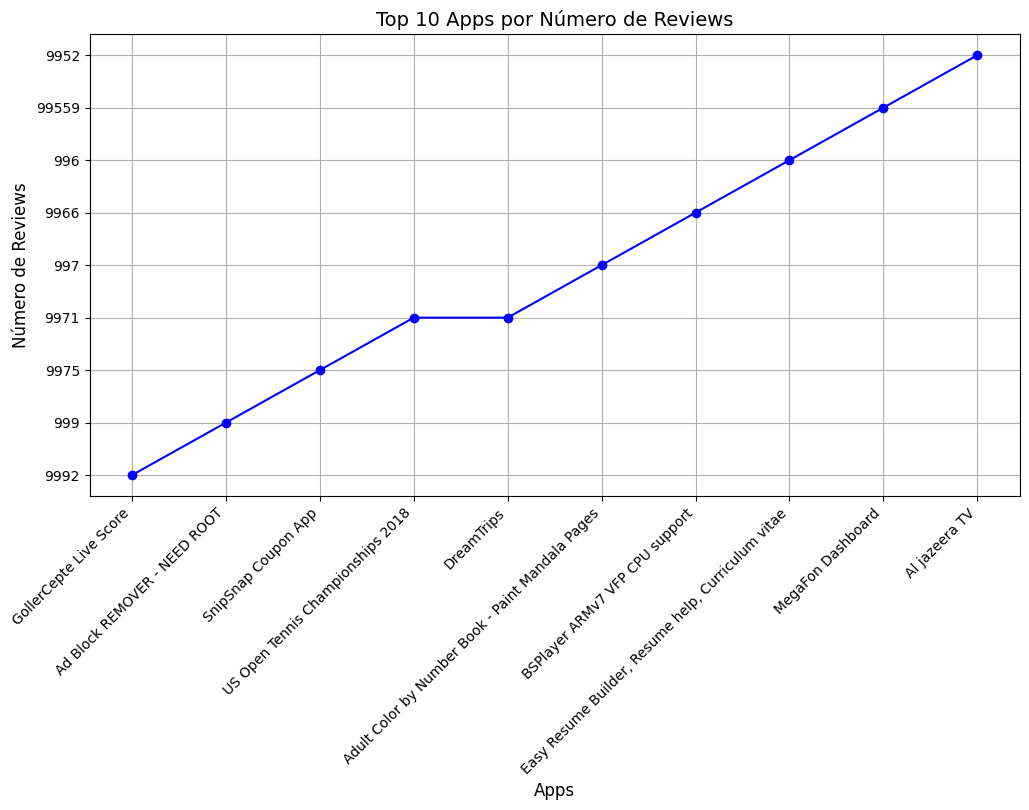

In [16]:
# Selecionando o Top 10 apps por número de reviews
top_10_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(top_10_reviews['App'], top_10_reviews['Reviews'], marker='o', linestyle='-', color='blue')

# Adicionando título e rótulos
plt.title('Top 10 Apps por Número de Reviews', fontsize=14)
plt.xlabel('Apps', fontsize=12)
plt.ylabel('Número de Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


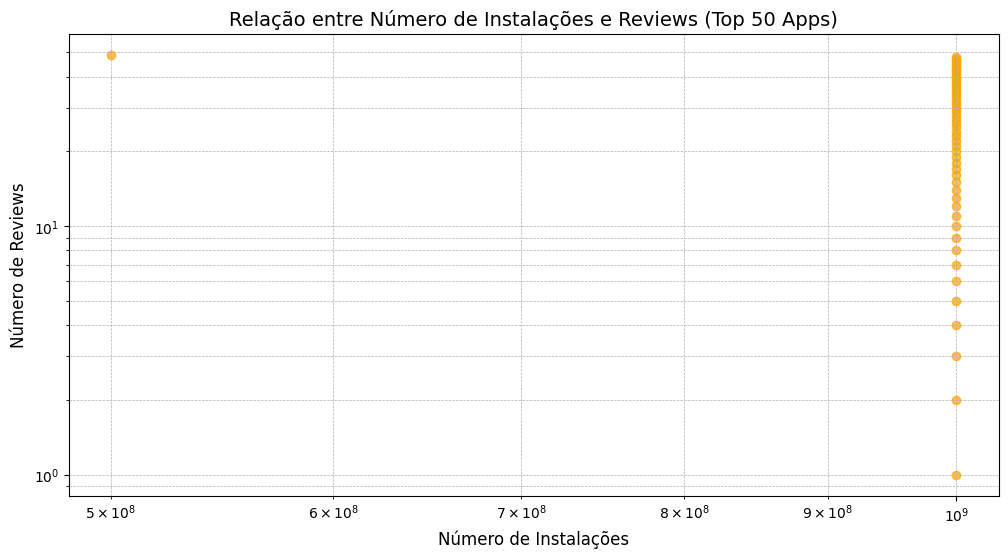

In [17]:
# Selecionando os 50 aplicativos mais instalados
top_50_installs = df[['App', 'Installs', 'Reviews']].sort_values(by='Installs', ascending=False).head(50)

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(top_50_installs['Installs'], top_50_installs['Reviews'], alpha=0.7, color='orange')

# Adicionando título e rótulos
plt.title('Relação entre Número de Instalações e Reviews (Top 50 Apps)', fontsize=14)
plt.xlabel('Número de Instalações', fontsize=12)
plt.ylabel('Número de Reviews', fontsize=12)
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
